In [22]:
import pandas as pd
import os
import numpy as np

from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import KFold

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

os.chdir("D:/WorkPath/PycharmProjects/MutTm-pred")
from Dataset.Process4Dataset.DatasetCeator4PonDT import Dataset4MutTm
from MachineLearning.Util import train_validation_test

In [23]:
dataset = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "context_embedding"],
                          context_length=200,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-3B",
                          embedding_method="add")

train_feature = np.array(dataset.train_feature_set)
train_label = np.array(dataset.train_label_set).ravel()
test_feature = np.array(dataset.test_feature_set)
test_leabel = np.array(dataset.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、训练集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了2989条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条379个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了137条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条10个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


### RFE

#### 50

[LightGBM] [Info] Total Bins 141471
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1150
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 138863
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1104
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 137234
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1073
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 135347
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1052
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 133821
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1031
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in t

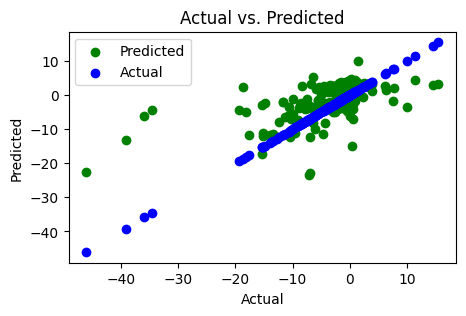

In [24]:
lgb_rfe_50 = RFE(LGBMRegressor(force_col_wise=True),
                 n_features_to_select=50,
                 step=50,
                 verbose=False)
lgb_rfe_50.fit(train_feature, train_label)

train_validation_test(LGBMRegressor(force_col_wise=True), 
                      lgb_rfe_50.transform(train_feature),
                      train_label,
                      lgb_rfe_50.transform(test_feature),
                      test_leabel)

Starting Training...
Time for Training: 0.11299943923950195
The Result for CV:
MAE:1.8597
PCC:0.8703
R2:0.7539
RMSE:3.7719
Time for CV:0.5463988780975342
Starting Testing...
The Result for Testing:MAE:3.8077
PCC:0.6749
R2:0.3601
RMSE:5.7932
Time for Testing:0.0020020008087158203


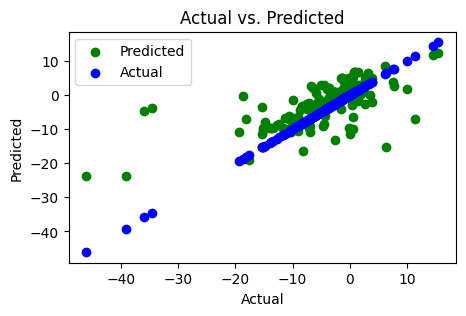

In [25]:
xgb_rfe_50 = RFE(XGBRegressor(),
                 n_features_to_select=50,
                 step=50,
                 verbose=False)
xgb_rfe_50.fit(train_feature, train_label)

train_validation_test(XGBRegressor(),
                      xgb_rfe_50.transform(train_feature),
                      train_label,
                      xgb_rfe_50.transform(test_feature),
                      test_leabel)

#### 100

[LightGBM] [Info] Total Bins 141471
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1150
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 138863
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1104
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 137234
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1073
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 135347
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1052
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 133821
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1031
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in t

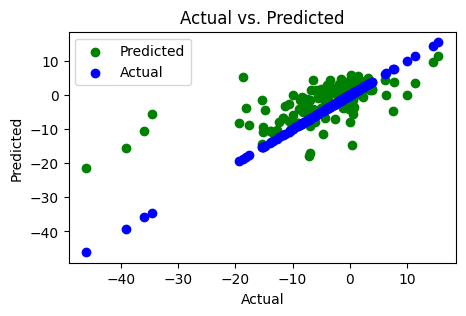

In [26]:
lgb_rfe_100 = RFE(LGBMRegressor(force_col_wise=True),
                 n_features_to_select=100,
                 step=50,
                 verbose=False)
lgb_rfe_100.fit(train_feature, train_label)

train_validation_test(LGBMRegressor(force_col_wise=True), 
                      lgb_rfe_100.transform(train_feature),
                      train_label,
                      lgb_rfe_100.transform(test_feature),
                      test_leabel)

Starting Training...
Time for Training: 0.1840982437133789
The Result for CV:
MAE:1.8500
PCC:0.8951
R2:0.7993
RMSE:3.3964
Time for CV:0.8936471939086914
Starting Testing...
The Result for Testing:MAE:4.4298
PCC:0.6343
R2:0.2441
RMSE:6.2965
Time for Testing:0.002000093460083008


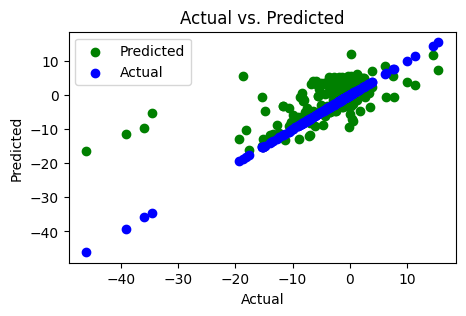

In [27]:
xgb_rfe_100 = RFE(XGBRegressor(),
                 n_features_to_select=100,
                 step=50,
                 verbose=False)
xgb_rfe_100.fit(train_feature, train_label)

train_validation_test(XGBRegressor(),
                      xgb_rfe_100.transform(train_feature),
                      train_label,
                      xgb_rfe_100.transform(test_feature),
                      test_leabel)

#### 200

[LightGBM] [Info] Total Bins 141471
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1150
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 138863
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1104
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 137234
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1073
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 135347
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1052
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 133821
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1031
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in t

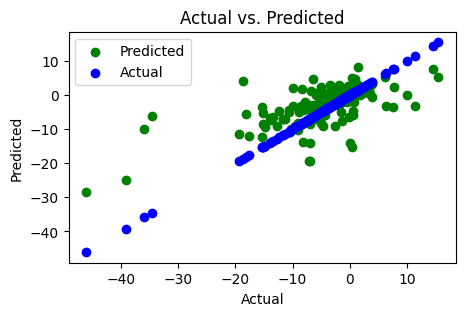

In [28]:
lgb_rfe_200 = RFE(LGBMRegressor(force_col_wise=True),
                 n_features_to_select=200,
                 step=50,
                 verbose=False)
lgb_rfe_200.fit(train_feature, train_label)

train_validation_test(LGBMRegressor(force_col_wise=True), 
                      lgb_rfe_200.transform(train_feature),
                      train_label,
                      lgb_rfe_200.transform(test_feature),
                      test_leabel)

In [29]:
np.array(dataset.train_feature_set.columns[lgb_rfe_200.support_])

array(['pH', 'Tm', 'neighbor3', 'neighbor5', 'neighbor6', 'neighbor8',
       'neighbor9', 'neighbor11', 'neighbor12', 'neighbor13',
       'neighbor16', 'neighbor18', 'neighbor21', 'neighbor22',
       'neighbor24', 'aaindex4', 'aaindex13', 'aaindex17', 'aaindex28',
       'aaindex29', 'aaindex32', 'aaindex41', 'aaindex48', 'aaindex72',
       'aaindex83', 'aaindex92', 'aaindex109', 'aaindex111', 'aaindex120',
       'aaindex130', 'aaindex140', 'aaindex144', 'aaindex169',
       'aaindex172', 'aaindex183', 'aaindex192', 'aaindex193',
       'aaindex204', 'aaindex205', 'aaindex246', 'aaindex252',
       'aaindex253', 'aaindex256', 'aaindex264', 'aaindex265',
       'aaindex271', 'aaindex328', 'aaindex331', 'aaindex336',
       'aaindex338', 'aaindex344', 'aaindex350', 'aaindex352',
       'aaindex354', 'aaindex359', 'aaindex367', 'aaindex368',
       'aaindex371', 'aaindex381', 'aaindex429', 'aaindex430',
       'aaindex446', 'aaindex457', 'aaindex487', 'aaindex504',
       'aaindex508

Starting Training...
Time for Training: 0.31939101219177246
The Result for CV:
MAE:1.9148
PCC:0.8915
R2:0.7924
RMSE:3.4575
Time for CV:1.56187105178833
Starting Testing...
The Result for Testing:MAE:4.3249
PCC:0.5950
R2:0.1881
RMSE:6.5255
Time for Testing:0.0020003318786621094


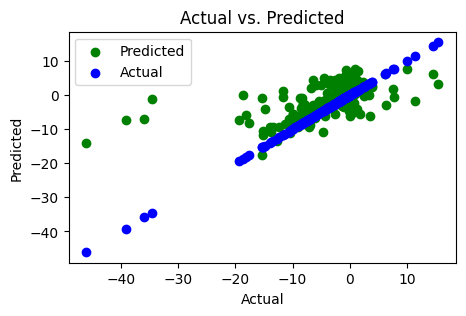

In [30]:
xgb_rfe_200 = RFE(XGBRegressor(),
                 n_features_to_select=200,
                 step=50,
                 verbose=False)
xgb_rfe_200.fit(train_feature, train_label)

train_validation_test(XGBRegressor(),
                      xgb_rfe_200.transform(train_feature),
                      train_label,
                      xgb_rfe_200.transform(test_feature),
                      test_leabel)

In [38]:
np.array(dataset.train_feature_set.columns[xgb_rfe_200.support_]).tofile(r"D:\OneDrive\Document\Pon-DT\feature_selection.txt", sep="\n")

#### 500

[LightGBM] [Info] Total Bins 141471
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1150
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 138863
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1104
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 137234
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1073
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 135347
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1052
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 133821
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1031
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in t

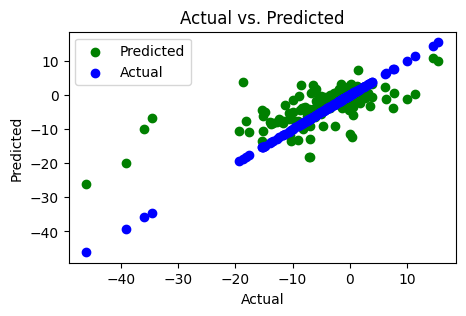

In [32]:
lgb_rfe_500 = RFE(LGBMRegressor(force_col_wise=True),
                 n_features_to_select=500,
                 step=50,
                 verbose=False)
lgb_rfe_500.fit(train_feature, train_label)

train_validation_test(LGBMRegressor(force_col_wise=True), 
                      lgb_rfe_500.transform(train_feature),
                      train_label,
                      lgb_rfe_500.transform(test_feature),
                      test_leabel)

Starting Training...
Time for Training: 0.7339732646942139
The Result for CV:
MAE:1.9973
PCC:0.8878
R2:0.7866
RMSE:3.5049
Time for CV:3.6411476135253906
Starting Testing...
The Result for Testing:MAE:4.2073
PCC:0.6765
R2:0.3126
RMSE:6.0044
Time for Testing:0.001999378204345703


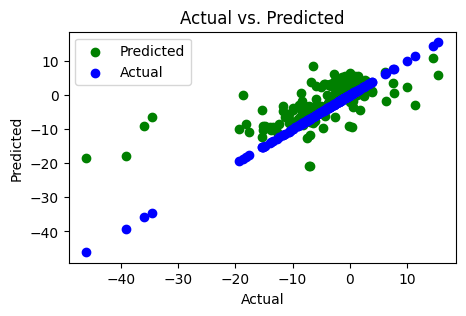

In [33]:
xgb_rfe_500 = RFE(XGBRegressor(),
                 n_features_to_select=500,
                 step=50,
                 verbose=False)
xgb_rfe_500.fit(train_feature, train_label)

train_validation_test(XGBRegressor(),
                      xgb_rfe_500.transform(train_feature),
                      train_label,
                      xgb_rfe_500.transform(test_feature),
                      test_leabel)

#### 1000

[LightGBM] [Info] Total Bins 141471
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1150
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 138863
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1104
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 137234
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1073
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 135347
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1052
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 133821
[LightGBM] [Info] Number of data points in the train set: 3659, number of used features: 1031
[LightGBM] [Info] Start training from score -2.004381
[LightGBM] [Info] Total Bins 130560
[LightGBM] [Info] Number of data points in t

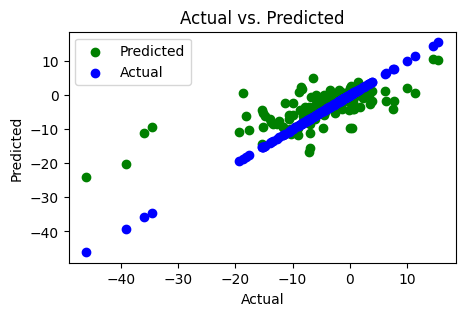

In [34]:
lgb_rfe_1000 = RFE(LGBMRegressor(force_col_wise=True),
                 n_features_to_select=1000,
                 step=50,
                 verbose=False)
lgb_rfe_1000.fit(train_feature, train_label)

train_validation_test(LGBMRegressor(force_col_wise=True), 
                      lgb_rfe_1000.transform(train_feature),
                      train_label,
                      lgb_rfe_1000.transform(test_feature),
                      test_leabel)

Starting Training...
Time for Training: 1.458916425704956
The Result for CV:
MAE:2.0078
PCC:0.8814
R2:0.7753
RMSE:3.5930
Time for CV:7.220493316650391
Starting Testing...
The Result for Testing:MAE:4.2009
PCC:0.6740
R2:0.3208
RMSE:5.9683
Time for Testing:0.0019998550415039062


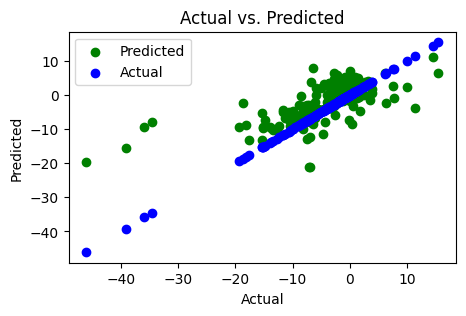

In [35]:
xgb_rfe_1000 = RFE(XGBRegressor(),
                 n_features_to_select=1000,
                 step=50,
                 verbose=False)
xgb_rfe_1000.fit(train_feature, train_label)

train_validation_test(XGBRegressor(),
                      xgb_rfe_1000.transform(train_feature),
                      train_label,
                      xgb_rfe_1000.transform(test_feature),
                      test_leabel)

### RFECV

#### 50

[LightGBM] [Info] Total Bins 133989
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1147
[LightGBM] [Info] Start training from score -2.049294
[LightGBM] [Info] Total Bins 133770
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1118
[LightGBM] [Info] Start training from score -2.049294
[LightGBM] [Info] Total Bins 129381
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1073
[LightGBM] [Info] Start training from score -2.049294
[LightGBM] [Info] Total Bins 125968
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1047
[LightGBM] [Info] Start training from score -2.049294
[LightGBM] [Info] Total Bins 124826
[LightGBM] [Info] Number of data points in the train set: 2927, number of used features: 1035
[LightGBM] [Info] Start training from score -2.049294
[LightGBM] [Info] Total Bins 120168
[LightGBM] [Info] Number of data points in t

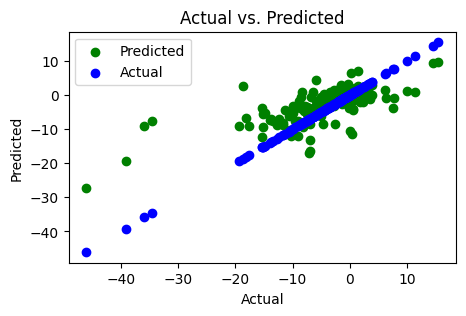

In [36]:
lgb_rfecv_50 = RFECV(LGBMRegressor(force_col_wise=True),
                     min_features_to_select=50,
                     step=50,
                     cv=KFold(5, shuffle=True, random_state=42),
                     verbose=False)
lgb_rfecv_50.fit(train_feature, train_label)

train_validation_test(LGBMRegressor(force_col_wise=True), 
                      lgb_rfecv_50.transform(train_feature),
                      train_label,
                      lgb_rfecv_50.transform(test_feature),
                      test_leabel)

In [37]:
len(lgb_rfecv_50.n_features_)

TypeError: object of type 'numpy.int32' has no len()

In [ ]:
xgb_rfecv_50 = RFECV(XGBRegressor(),
                     min_features_to_select=50,
                     step=50,
                     cv=KFold(5, shuffle=True, random_state=42),
                     verbose=False)
xgb_rfecv_50.fit(train_feature, train_label)

train_validation_test(XGBRegressor(), 
                      xgb_rfecv_50.transform(train_feature),
                      train_label,
                      xgb_rfecv_50.transform(test_feature),
                      test_leabel)

#### 100

In [ ]:
lgb_rfecv_100 = RFECV(LGBMRegressor(force_col_wise=True),
                     min_features_to_select=100,
                     step=50,
                     cv=KFold(5, shuffle=True, random_state=42),
                     verbose=False)
lgb_rfecv_100.fit(train_feature, train_label)

train_validation_test(LGBMRegressor(force_col_wise=True), 
                      lgb_rfecv_100.transform(train_feature),
                      train_label,
                      lgb_rfecv_100.transform(test_feature),
                      test_leabel)

In [ ]:
xgb_rfecv_100 = RFECV(XGBRegressor(),
                     min_features_to_select=100,
                     step=50,
                     cv=KFold(5, shuffle=True, random_state=42),
                     verbose=False)
xgb_rfecv_100.fit(train_feature, train_label)

train_validation_test(XGBRegressor(), 
                      xgb_rfecv_100.transform(train_feature),
                      train_label,
                      xgb_rfecv_100.transform(test_feature),
                      test_leabel)

#### 200

In [ ]:
lgb_rfecv_200= RFECV(LGBMRegressor(force_col_wise=True),
                     min_features_to_select=200,
                     step=50,
                     cv=KFold(5, shuffle=True, random_state=42),
                     verbose=False)
lgb_rfecv_200.fit(train_feature, train_label)

train_validation_test(LGBMRegressor(force_col_wise=True), 
                      lgb_rfecv_200.transform(train_feature),
                      train_label,
                      lgb_rfecv_200.transform(test_feature),
                      test_leabel)

In [ ]:
xgb_rfecv_200 = RFECV(XGBRegressor(),
                     min_features_to_select=200,
                     step=50,
                     cv=KFold(5, shuffle=True, random_state=42),
                     verbose=False)
xgb_rfecv_200.fit(train_feature, train_label)

train_validation_test(XGBRegressor(), 
                      xgb_rfecv_200.transform(train_feature),
                      train_label,
                      xgb_rfecv_200.transform(test_feature),
                      test_leabel)

#### 500

In [ ]:
lgb_rfecv_500 = RFECV(LGBMRegressor(force_col_wise=True),
                     min_features_to_select=500,
                     step=50,
                     cv=KFold(5, shuffle=True, random_state=42),
                     verbose=False)
lgb_rfecv_500.fit(train_feature, train_label)

train_validation_test(LGBMRegressor(force_col_wise=True), 
                      lgb_rfecv_500.transform(train_feature),
                      train_label,
                      lgb_rfecv_500.transform(test_feature),
                      test_leabel)

In [ ]:
xgb_rfecv_500 = RFECV(XGBRegressor(),
                     min_features_to_select=500,
                     step=50,
                     cv=KFold(5, shuffle=True, random_state=42),
                     verbose=False)
xgb_rfecv_500.fit(train_feature, train_label)

train_validation_test(XGBRegressor(), 
                      xgb_rfecv_500.transform(train_feature),
                      train_label,
                      xgb_rfecv_500.transform(test_feature),
                      test_leabel)

#### 1000

In [ ]:
lgb_rfecv_1000 = RFECV(LGBMRegressor(force_col_wise=True),
                     min_features_to_select=1000,
                     step=50,
                     cv=KFold(5, shuffle=True, random_state=42),
                     verbose=False)
lgb_rfecv_1000.fit(train_feature, train_label)

train_validation_test(LGBMRegressor(force_col_wise=True), 
                      lgb_rfecv_1000.transform(train_feature),
                      train_label,
                      lgb_rfecv_1000.transform(test_feature),
                      test_leabel)

In [ ]:
xgb_rfecv_1000 = RFECV(XGBRegressor(),
                     min_features_to_select=1000,
                     step=50,
                     cv=KFold(5, shuffle=True, random_state=42),
                     verbose=False)
xgb_rfecv_1000.fit(train_feature, train_label)

train_validation_test(XGBRegressor(), 
                      xgb_rfecv_1000.transform(train_feature),
                      train_label,
                      xgb_rfecv_1000.transform(test_feature),
                      test_leabel)

### full

In [ ]:
train_validation_test(LGBMRegressor(force_col_wise=True), 
                      train_feature,
                      train_label,
                      test_feature,
                      test_leabel)

In [ ]:
train_validation_test(XGBRegressor(),
                      train_feature,
                      train_label,
                      test_feature,
                      test_leabel)